In [61]:
import pandas as pd 
import numpy as np
import torch

In [62]:
xiang_filtered = pd.read_csv("xiang_filtered.csv")
xiang_filtered_embeddings = torch.load("filtered_embeddings.pt")

#xiang_filtered = pd.read_csv("relabled_ccad.csv")
#xiang_filtered_embeddings = torch.load("relabled_ccad.pt")
#xiang_filtered_embeddings = xiang_filtered_embeddings["embeddings"]

In [63]:
import matplotlib.pyplot as plt

In [64]:
xiang_filtered_embeddings = [x.mean(dim=1).squeeze(0) for x in xiang_filtered_embeddings]

In [65]:
#xiang_filtered["new_kr"].unique()
xiang_filtered["Annotation"].unique()

array(['B1', 'A', 'A1', 'A2', 'B', 'C', 'C2', 'B2', 'C1'], dtype=object)

In [66]:
xiang_filtered_NEW = xiang_filtered.dropna(axis=0)

In [67]:
xiang_filtered_NEW

,BGC code in MIBiG or name of product,Name of protein,Order of module,Annotation,Extender,Organism,Taxonomy,Sequence
0,actinopyrone,atpn1,M2,B1,MM,Streptomyces sp. SCSIO ZS0520,Actinomycetes,HTTLVTGGTGALGPHIARWLAEAGAERLVVTSRRGPLAEGMPELVA...
1,aetokthonostatin,aesJ,M4,A,M,Aetokthonos hydrillicola Thurmond2011,Cyanobacteriota,GVYLITGGLGNMGMVLSEFLASNYQAKLLIVSSRAFPKSSQWQEWL...
2,aetokthonostatin,aesB,M6,A1,M,Aetokthonos hydrillicola Thurmond2011,Cyanobacteriota,GVYLIFGGLGRVGLLLALDLAQRVKAKLVLVSRSELPPRSEWESWF...
3,aminoansamycin,aasA,M1,A,M,Streptomyces sp.,Actinomycetes,GTVLITGGSGGVGARIARRLARAGAGHLLLSSRRGPAAEGAAELVA...
4,Amphotericin,AF357202_AmphB1,M1,A2,MM,Streptomyces nodosus,Actinomycetes,GTTLVTGGSGTLAPGLARHLAAQGAEHLVLLSRRGADAPGAAELAA...
...,...,...,...,...,...,...,...,...
757,vancoresmycin,PKS4,M8,B,M,Amycolatopsis sp.,Actinomycetes,GGGLVPDAAAGARHRRGARARMLTSRRGTDAPGAAELVAELTAAGT...
758,vancoresmycin,PKS5,M9,A,M,Amycolatopsis sp.,Actinomycetes,GTVLVTGGTGALGSAVARWAAQAGAAHVILLSRSGPEAPGAAALLE...
759,venediol,vedC,M5,B1,MM,Streptomyces venezuelae,Actinomycetes,GTVLITGGTGSLGALFARHLVTRHGVRDLLLTSRRGDKADGARELG...
760,verticilactam,vtlP4,M6,B,M,Streptomyces spiroverticillatus,Actinomycetes,GTTLITGGTGALGAHLARSLARHGAAHLVLTSRRGSDAPGAAELAA...


In [68]:
#xiang_filtered_NEW["new_kr"].unique()
xiang_filtered_NEW["Annotation"].unique()

array(['B1', 'A', 'A1', 'A2', 'B', 'C', 'C2', 'B2', 'C1'], dtype=object)

In [69]:
dropped_rows = xiang_filtered.index.difference(xiang_filtered_NEW.index)

In [70]:
dropped_rows = dropped_rows.tolist()

In [71]:
dropped_rows

[361, 404]

In [72]:
xiang_filtered_embeddings = [x for i,x in enumerate(xiang_filtered_embeddings) if i not in dropped_rows]

In [73]:
len(xiang_filtered_embeddings)

760

In [74]:
xiang_filtered = xiang_filtered_NEW

In [75]:
xiang_filtered = xiang_filtered.reset_index()

In [76]:
embeddings_np = np.stack([emb.numpy() for emb in xiang_filtered_embeddings])

### REMOVE ONE (1) ANNOTATIONS BELOW

In [77]:
def remove_ones(item):
    if "1" in item:
        item = item.replace("1", "")
    return item
#xiang_filtered["Annotation"] = xiang_filtered["Annotation"].apply(remove_ones)
#xiang_filtered["new_kr"] = xiang_filtered["new_kr"].apply(remove_ones)

In [78]:
xiang_filtered

,index,BGC code in MIBiG or name of product,Name of protein,Order of module,Annotation,Extender,Organism,Taxonomy,Sequence
0,0,actinopyrone,atpn1,M2,B1,MM,Streptomyces sp. SCSIO ZS0520,Actinomycetes,HTTLVTGGTGALGPHIARWLAEAGAERLVVTSRRGPLAEGMPELVA...
1,1,aetokthonostatin,aesJ,M4,A,M,Aetokthonos hydrillicola Thurmond2011,Cyanobacteriota,GVYLITGGLGNMGMVLSEFLASNYQAKLLIVSSRAFPKSSQWQEWL...
2,2,aetokthonostatin,aesB,M6,A1,M,Aetokthonos hydrillicola Thurmond2011,Cyanobacteriota,GVYLIFGGLGRVGLLLALDLAQRVKAKLVLVSRSELPPRSEWESWF...
3,3,aminoansamycin,aasA,M1,A,M,Streptomyces sp.,Actinomycetes,GTVLITGGSGGVGARIARRLARAGAGHLLLSSRRGPAAEGAAELVA...
4,4,Amphotericin,AF357202_AmphB1,M1,A2,MM,Streptomyces nodosus,Actinomycetes,GTTLVTGGSGTLAPGLARHLAAQGAEHLVLLSRRGADAPGAAELAA...
...,...,...,...,...,...,...,...,...,...
755,757,vancoresmycin,PKS4,M8,B,M,Amycolatopsis sp.,Actinomycetes,GGGLVPDAAAGARHRRGARARMLTSRRGTDAPGAAELVAELTAAGT...
756,758,vancoresmycin,PKS5,M9,A,M,Amycolatopsis sp.,Actinomycetes,GTVLVTGGTGALGSAVARWAAQAGAAHVILLSRSGPEAPGAAALLE...
757,759,venediol,vedC,M5,B1,MM,Streptomyces venezuelae,Actinomycetes,GTVLITGGTGSLGALFARHLVTRHGVRDLLLTSRRGDKADGARELG...
758,760,verticilactam,vtlP4,M6,B,M,Streptomyces spiroverticillatus,Actinomycetes,GTTLITGGTGALGAHLARSLARHGAAHLVLTSRRGSDAPGAAELAA...


In [79]:
from sklearn.decomposition import PCA

In [80]:
pca = PCA(n_components=2)

In [81]:
pca_components = pca.fit_transform(embeddings_np)

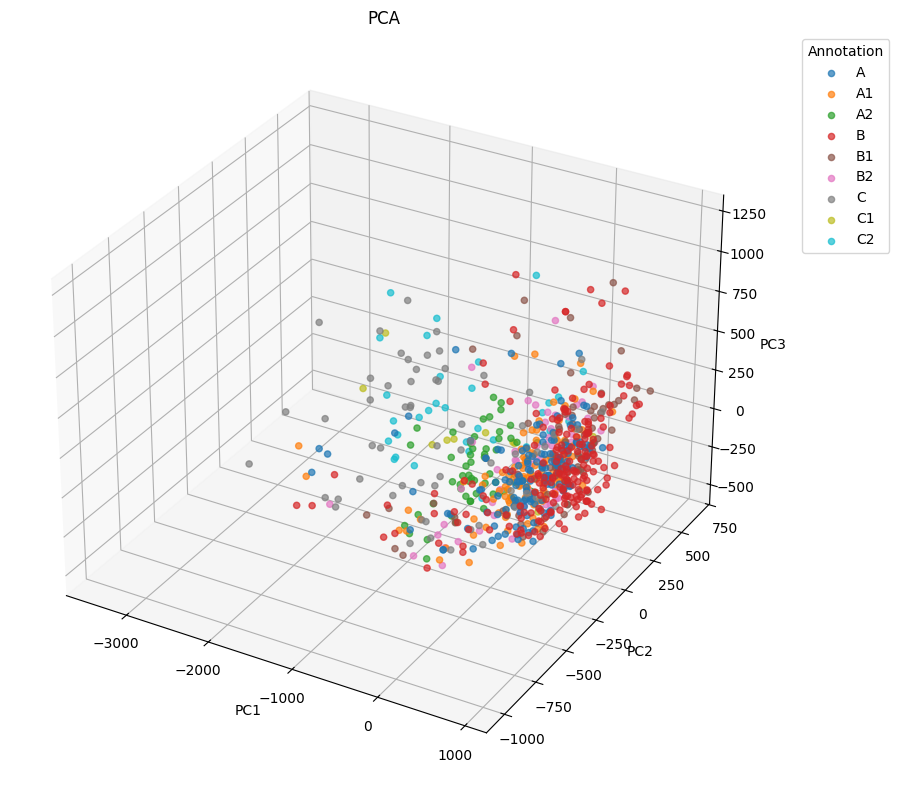

In [82]:

pca = PCA(n_components=3)
pca_components = pca.fit_transform(embeddings_np)


#annotations = xiang_filtered['new_kr'].values
annotations = xiang_filtered['Annotation'].values
unique_annotations = np.unique(annotations)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_annotations)))
color_map = dict(zip(unique_annotations, colors))


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for ann in unique_annotations:
    idx = annotations == ann
    ax.scatter(pca_components[idx, 0], pca_components[idx, 1], pca_components[idx, 2], 
               color=color_map[ann], label=ann, alpha=0.7, s=20)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('PCA')
ax.legend(title='Annotation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [83]:
import plotly.express as px
import pandas as pd


df_plot = pd.DataFrame({
    'PC1': pca_components[:, 0],
    'PC2': pca_components[:, 1],
    'PC3': pca_components[:, 2],
    'Annotation': annotations
})


fig = px.scatter_3d(df_plot, x='PC1', y='PC2', z='PC3', color='Annotation',
                    title='PCA',
                    opacity=0.5, size_max=5)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show() 

In [84]:
fig.write_html('pca_3d.html')

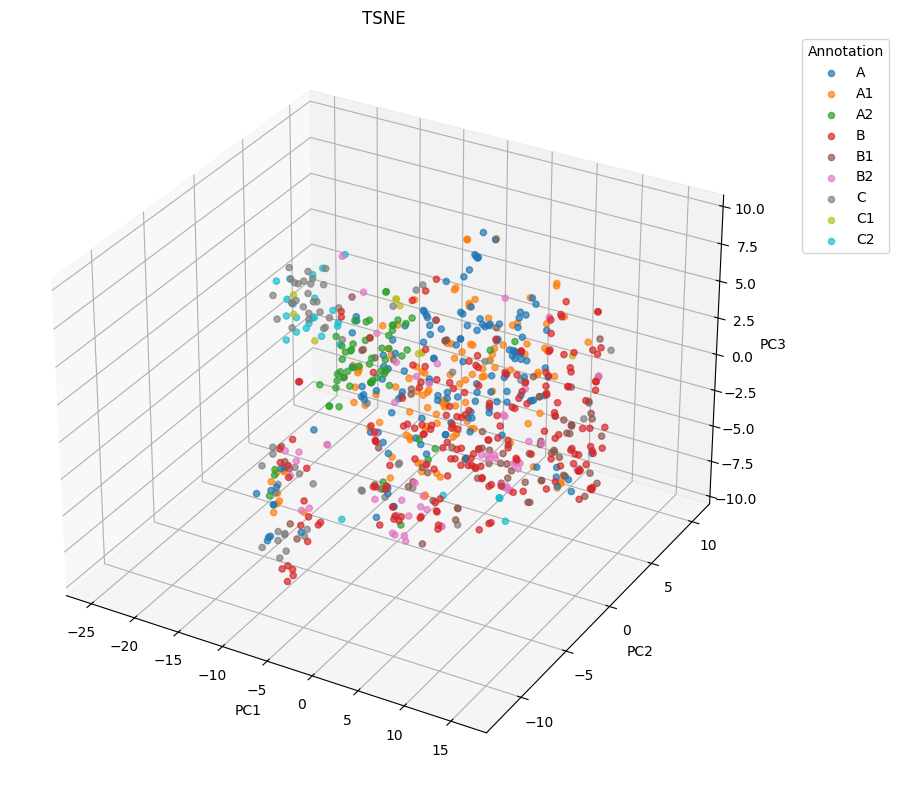

In [85]:
from sklearn.manifold import TSNE 
tsne = TSNE(n_components=3)
tsne_components = tsne.fit_transform(embeddings_np)


#annotations = xiang_filtered['new_kr'].values
annotations = xiang_filtered['Annotation'].values
unique_annotations = np.unique(annotations)
colors = plt.cm.tab10(np.linspace(0, 1, len(unique_annotations)))
color_map = dict(zip(unique_annotations, colors))


fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

for ann in unique_annotations:
    idx = annotations == ann
    ax.scatter(tsne_components[idx, 0], tsne_components[idx, 1], tsne_components[idx, 2], 
               color=color_map[ann], label=ann, alpha=0.7, s=20)

ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('TSNE')
ax.legend(title='Annotation', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [86]:
import plotly.express as px
import pandas as pd


df_plot = pd.DataFrame({
    'PC1': tsne_components[:, 0],
    'PC2': tsne_components[:, 1],
    'PC3': tsne_components[:, 2],
    'Annotation': annotations
})


fig = px.scatter_3d(df_plot, x='PC1', y='PC2', z='PC3', color='Annotation',
                    title='TSNE',
                    opacity=0.5, size_max=5)

fig.update_layout(margin=dict(l=0, r=0, b=0, t=0))
fig.show()

We are running t-SNE


In [87]:
fig.write_html('tsne_3d.html')